In [26]:
# import libraries 
import json
import networkx as nx
import numpy as np
import os
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as app
from scipy.stats import pearsonr
import seaborn as sns
import pylab
from scipy.stats import mannwhitneyu
import datetime
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.api as sm
from itertools import chain
import sys
import inspect
import time
# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

import newsrc.population as p
import newsrc.model as m
import newsrc.simulation as s


%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
try:
    input_args = json.loads(open('../input/simulation.json').read())
except Exception as ex:
    print('simulation.json does not exist!')
    print(ex)

In [89]:
simulation =  s.Simulation()

/Users/bojansimoski/dev/eur/ABM-PA/newsrc/simulation.py:28: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.PeerNominatedDataPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args)
<ipython-input-89-a3380912ab34>:1: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  simulation =  s.Simulation()
/Users/bojansimoski/dev/eur/ABM-PA/newsrc/simulation.py:29: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.CommunicationDataPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)


In [239]:
results_comm, results_avg_comm, agents_per_intervention_comm = simulation.simulate_interventions(365,'communication')

In [240]:
results_nomm, results_avg_nomm, agents_per_intervention_nomm = simulation.simulate_interventions(365,'peer')

In [241]:
success_rates_comm = simulation.getSuccessRates(results_avg_comm)
success_rates_nomm = simulation.getSuccessRates(results_avg_nomm)
display(success_rates_nomm,success_rates_comm)

/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.



,SchoolClass,Intervention,SuccessRate,StartIntervention,EndIntervention
0,78.0,nointervention,4.91,1.331345,1.396758
1,78.0,outdegree,4.26,1.362908,1.420981
2,78.0,indegree,4.76,1.370481,1.435679
3,78.0,closeness,4.76,1.370481,1.435679
4,78.0,betweenness,4.59,1.368358,1.431194
...,...,...,...,...,...
100,303.0,nointervention,17.54,1.553262,1.825781
101,303.0,outdegree,16.38,1.590690,1.851287
102,303.0,indegree,16.26,1.595105,1.854461
103,303.0,closeness,16.26,1.595105,1.854461


,SchoolClass,Intervention,SuccessRate,StartIntervention,EndIntervention
0,78.0,nointervention,-1.27,1.298317,1.281816
1,78.0,outdegree,1.07,1.336777,1.351037
2,78.0,indegree,1.74,1.340426,1.363792
3,78.0,closeness,0.00,1.337507,1.337513
4,78.0,betweenness,0.00,1.337507,1.337513
...,...,...,...,...,...
100,303.0,nointervention,1.67,1.553262,1.579220
101,303.0,outdegree,4.57,1.593926,1.666812
102,303.0,indegree,8.41,1.590690,1.724397
103,303.0,closeness,8.41,1.590690,1.724397


In [242]:
display(success_rates_nomm.groupby(['Intervention'])['SuccessRate'].mean(),success_rates_comm.groupby(['Intervention'])['SuccessRate'].mean())

Intervention
betweenness       16.271905
closeness         17.702857
indegree          17.499524
nointervention    15.549524
outdegree         15.137143
Name: SuccessRate, dtype: float64

Intervention
betweenness       15.847619
closeness         16.802381
indegree          15.906190
nointervention    14.872381
outdegree         16.139524
Name: SuccessRate, dtype: float64

In [243]:
success_rates_comm = success_rates_comm[success_rates_comm.Intervention.isin(['indegree','betweenness','closeness','outdegree'])]
sr_mean_comm = success_rates_comm.groupby(['SchoolClass'])['SuccessRate'].mean().reset_index()

success_rates_nomm = success_rates_nomm[success_rates_nomm.Intervention.isin(['indegree','betweenness','closeness','outdegree'])]
sr_mean_nomm = success_rates_nomm.groupby(['SchoolClass'])['SuccessRate'].mean().reset_index()

display(sr_mean_nomm,sr_mean_comm)

,SchoolClass,SuccessRate
0,100.0,11.6550
1,124.0,15.5750
2,125.0,9.3375
3,256.0,59.3000
4,258.0,16.6775
5,261.0,9.8350
6,262.0,28.3100
7,263.0,12.5975
8,272.0,16.1375
9,273.0,19.3750


,SchoolClass,SuccessRate
0,100.0,20.0075
1,124.0,29.8925
2,125.0,9.3600
3,256.0,42.7050
4,258.0,33.5900
5,261.0,10.3225
6,262.0,18.0050
7,263.0,11.2400
8,272.0,22.3250
9,273.0,16.2050


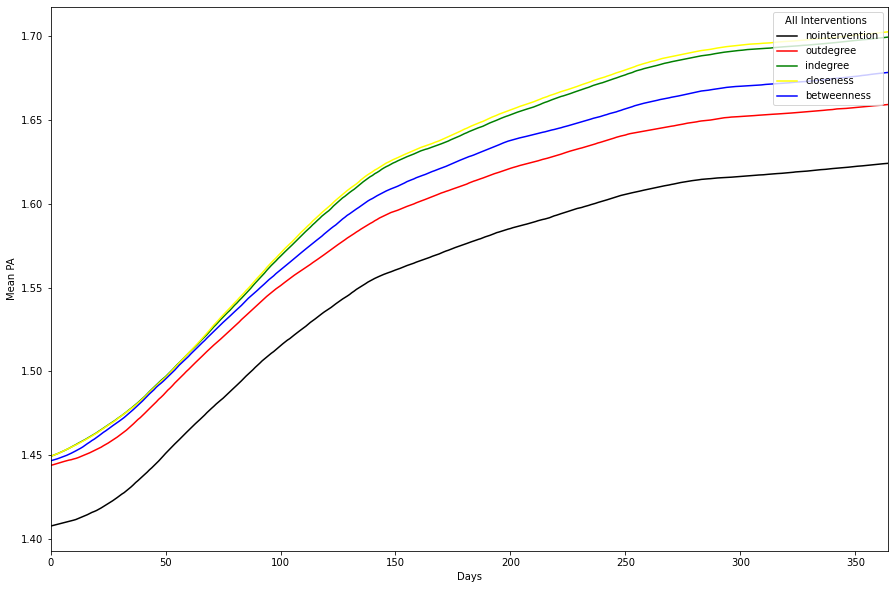

In [244]:
simulation.plot_interventions_averaged(results_avg_nomm)

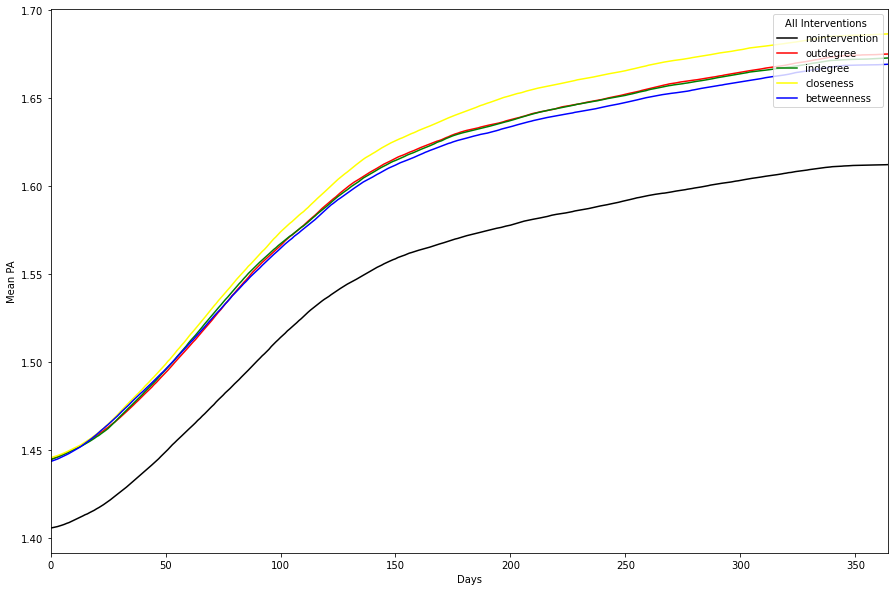

In [245]:
simulation.plot_interventions_averaged(results_avg_comm)

In [42]:
pop_details_nomm, agents_details_nomm = simulation.PeerNominatedDataPopulation.population_network_summary(simulation.PeerNominatedDataPopulation.graph)

/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:282: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


In [45]:
pop_details_comm, agents_details_comm = simulation.CommunicationDataPopulation.population_network_summary(simulation.CommunicationDataPopulation.graph)

/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:282: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/networkx/algorithms/assortativity/mixing.py:208: RuntimeWarning: invalid value encountered in true_divide
  a = a / a.sum()


In [47]:
pop_details_comm

,SchoolClassID,NumberOfAgents,PercentageFemale,NumberConnections,Density,IsolatedNodes,CentralizationInDegree,CentralizationOutDegree,CentralizationCloseness,CentralizationBetweenness,DegreeAssortativity,AverageEnvironmentScore,AverageBMIScore
0,78.0,17,58,42,0.15,1,0.67,0.67,-0.29,-0.42,0.16,0.56,-1.0
1,81.0,19,52,71,0.21,0,0.57,0.89,-0.27,-0.69,-0.33,0.48,-1.0
2,100.0,19,36,92,0.27,0,0.55,0.60,-0.23,-0.35,-0.09,0.56,-1.0
3,124.0,17,64,76,0.28,0,0.60,0.80,-0.53,-1.31,-0.02,0.53,-1.0
4,125.0,16,56,73,0.30,0,0.52,0.80,-0.36,-0.64,-0.06,0.50,-1.0
5,256.0,21,57,65,0.15,0,0.50,0.61,-0.18,-0.77,-0.01,0.37,-1.0
6,258.0,16,62,33,0.14,1,0.88,0.88,-0.54,-0.39,-0.24,0.32,-1.0
7,261.0,17,35,90,0.33,0,0.56,0.76,-0.68,-1.15,-0.15,0.46,-1.0
8,262.0,15,46,62,0.30,0,0.59,0.81,-0.30,-1.77,-0.14,0.47,-1.0
9,263.0,20,65,163,0.43,0,0.37,0.63,-0.37,-0.31,NaN,0.39,-1.0


In [44]:
pop_details_nomm

,SchoolClassID,NumberOfAgents,PercentageFemale,NumberConnections,Density,IsolatedNodes,CentralizationInDegree,CentralizationOutDegree,CentralizationCloseness,CentralizationBetweenness,DegreeAssortativity,AverageEnvironmentScore,AverageBMIScore
0,78.0,18,55,114,0.37,0,0.43,0.68,-0.38,-0.52,-0.55,0.59,-1.0
1,81.0,19,52,184,0.54,0,0.29,0.52,-0.47,-0.12,0.04,0.48,-1.0
2,100.0,19,36,171,0.50,0,0.35,0.56,-0.66,-0.27,-0.33,0.56,-1.0
3,124.0,17,64,181,0.67,0,0.27,0.38,-1.21,-0.12,-0.23,0.53,-1.0
4,125.0,16,56,132,0.55,0,0.42,0.51,-1.71,-0.21,-0.04,0.50,-1.0
5,256.0,22,54,154,0.33,0,0.35,0.73,-0.43,-0.28,NaN,0.37,-1.0
6,258.0,16,62,102,0.42,0,0.49,0.43,-1.83,-0.33,-0.12,0.32,-1.0
7,261.0,17,35,137,0.50,0,0.38,0.56,-0.74,-0.50,-0.12,0.46,-1.0
8,262.0,15,46,83,0.40,0,0.67,0.46,-6.18,-0.51,-0.02,0.47,-1.0
9,263.0,20,65,163,0.43,0,0.43,0.63,-0.54,-0.26,-0.18,0.39,-1.0


In [249]:
pop_details_nomm['CentralizationInDegree'].describe(),pop_details_comm['CentralizationInDegree'].describe()

(count    21.000000
 mean      0.385714
 std       0.087325
 min       0.270000
 25%       0.340000
 50%       0.360000
 75%       0.420000
 max       0.670000
 Name: CentralizationInDegree, dtype: float64,
 count    21.000000
 mean      0.479524
 std       0.160233
 min       0.210000
 25%       0.370000
 50%       0.500000
 75%       0.570000
 max       0.880000
 Name: CentralizationInDegree, dtype: float64)

In [250]:
nomm_subgraphs = simulation.PeerNominatedDataPopulation.get_class_graphs(simulation.PeerNominatedDataPopulation.graph)

In [251]:
comm_subgraphs = simulation.CommunicationDataPopulation.get_class_graphs(simulation.CommunicationDataPopulation.graph)

In [252]:
network_similarity = []
for i in range(0,21):
    network_similarity.append(simulation.CommunicationDataPopulation.get_accuracy(comm_subgraphs[i],nomm_subgraphs[i]))

In [253]:
import statistics
statistics.stdev(network_similarity), statistics.mean(network_similarity)



(0.0702000878259504, 0.6481503615939129)

In [254]:
for i in range(0,21):
    print(simulation.CommunicationDataPopulation.get_accuracy(nomm_subgraphs[i],comm_subgraphs[i]))

0.7058823529411765
0.5350877192982456
0.652046783625731
0.5625
0.4875
0.7554112554112554
0.7041666666666667
0.6433823529411765
0.7476190476190476
0.6684210526315789
0.625
0.6413043478260869
0.6333333333333333
0.7205882352941176
0.7416666666666667
0.6071428571428571
0.6695906432748538
0.6169590643274854
0.5652173913043478
0.6578947368421053
0.7316666666666667


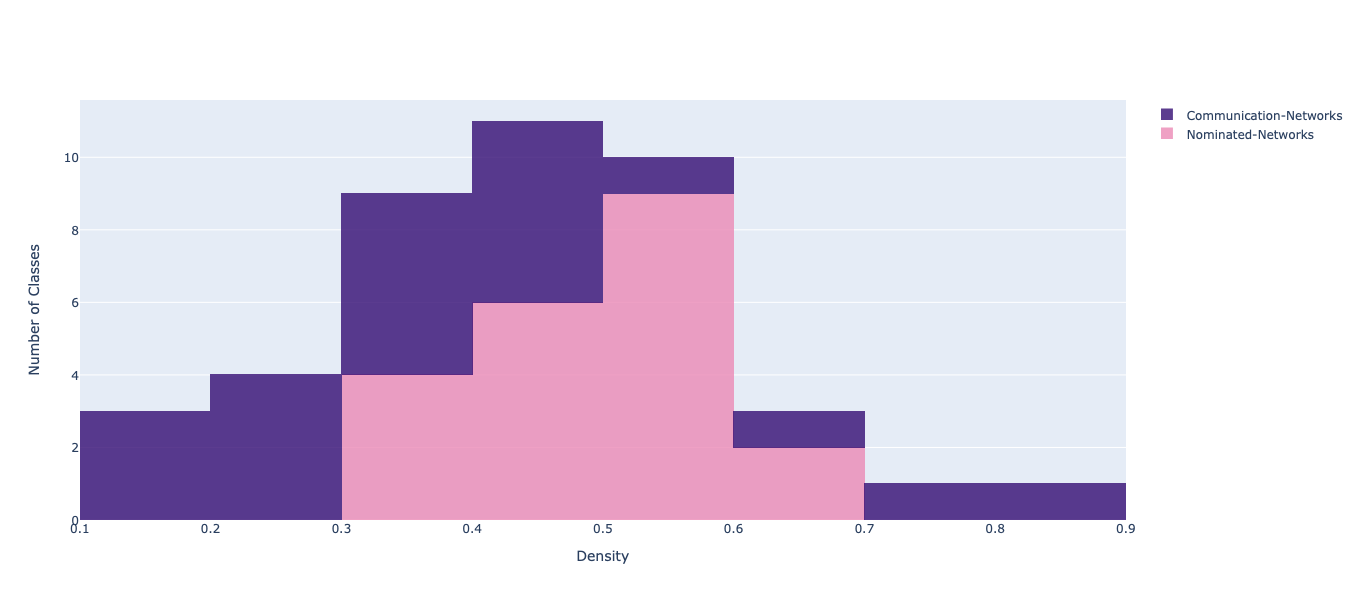

In [255]:
import plotly.graph_objects as go

import numpy as np

x0 = pop_details_nomm['Density']
# Add 1 to shift the mean of the Gaussian distribution
x1 = pop_details_comm['Density']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0,
    name='Nominated-Networks', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        size=0.1
    ),
    marker_color='#EB89B5',
    opacity=0.75))
fig.add_trace(go.Histogram(x=x1,
    name='Communication-Networks',
    xbins=dict(
        size=0.1
    ),
    marker_color='#330C73',
    opacity=0.75))

# Overlay both histograms
fig.update_layout(xaxis_title="Density", yaxis_title="Number of Classes",width=800, height=600,barmode='stack')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.8)
fig.show()

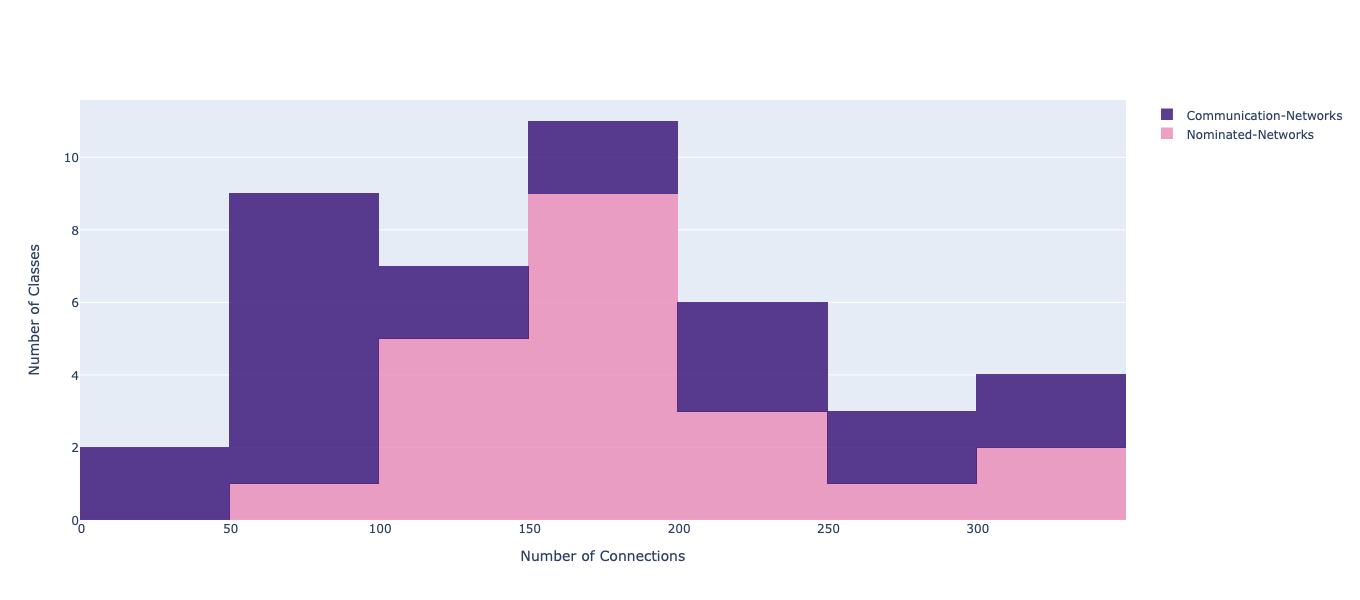

In [256]:
import plotly.graph_objects as go

import numpy as np

x0 = pop_details_nomm['NumberConnections']
# Add 1 to shift the mean of the Gaussian distribution
x1 = pop_details_comm['NumberConnections']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0,
    name='Nominated-Networks', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
     
        size=50
    ),
    marker_color='#EB89B5',
    opacity=0.75))
fig.add_trace(go.Histogram(x=x1,
    name='Communication-Networks',
    xbins=dict(
     
        size=50
    ),
    marker_color='#330C73',
    opacity=0.75))

# Overlay both histograms
fig.update_layout(xaxis_title="Number of Connections", yaxis_title="Number of Classes", width=800, height=600, barmode='stack')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.8)
fig.show()

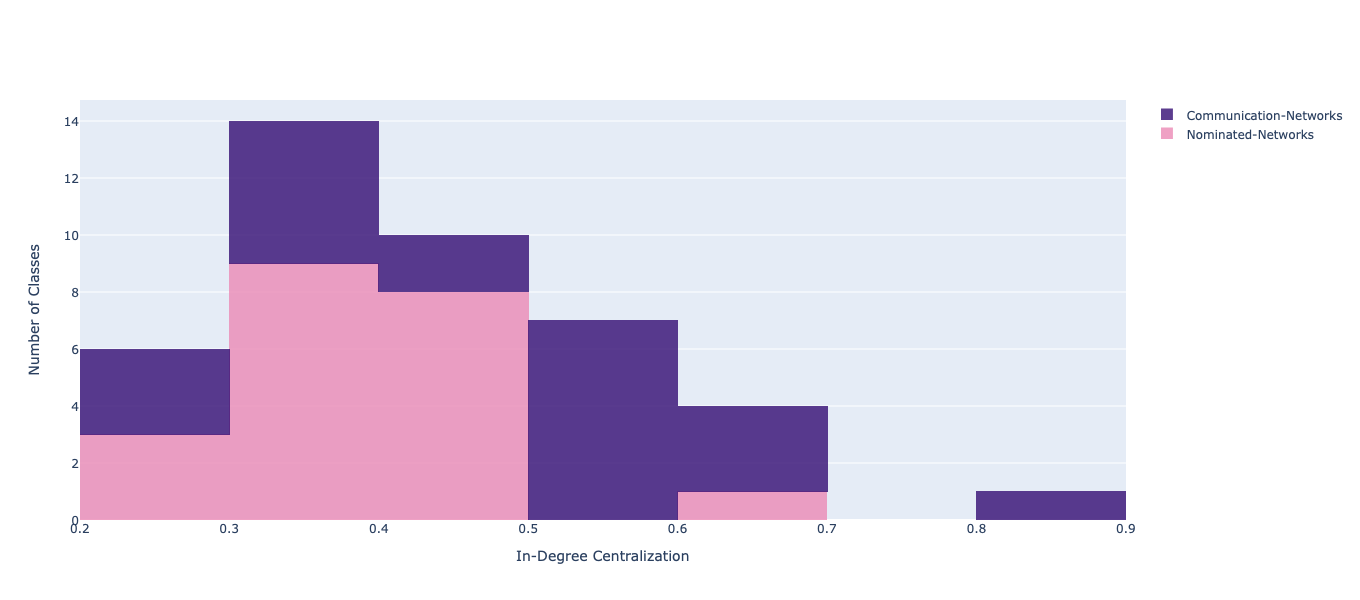

In [257]:
import plotly.graph_objects as go

import numpy as np

x0 = pop_details_nomm['CentralizationInDegree']
# Add 1 to shift the mean of the Gaussian distribution
x1 = pop_details_comm['CentralizationInDegree']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0,
    name='Nominated-Networks', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
     
        size=0.1
    ),
    marker_color='#EB89B5',
    opacity=0.75))
fig.add_trace(go.Histogram(x=x1,
    name='Communication-Networks',
    xbins=dict(
     
        size=0.1
    ),
    marker_color='#330C73',
    opacity=0.75))

# Overlay both histograms
fig.update_layout(xaxis_title="In-Degree Centralization", yaxis_title="Number of Classes", width=800, height=600,barmode='stack')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.8)
fig.show()

In [258]:
pop_details_comm, agents_details_comm = simulation.CommunicationDataPopulation.population_network_summary(simulation.CommunicationDataPopulation.graph)

/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:282: RuntimeWarning:

invalid value encountered in double_scalars

/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/networkx/algorithms/assortativity/mixing.py:208: RuntimeWarning:

invalid value encountered in true_divide



In [259]:
pop_details_comm

,SchoolClassID,NumberOfAgents,PercentageFemale,NumberConnections,Density,IsolatedNodes,CentralizationInDegree,CentralizationOutDegree,CentralizationCloseness,CentralizationBetweenness,DegreeAssortativity,AverageEnvironmentScore,AverageBMIScore
0,78.0,17,58,42,0.15,1,0.67,0.67,-0.29,-0.42,0.16,0.56,-1.0
1,81.0,19,52,71,0.21,0,0.57,0.89,-0.27,-0.69,-0.33,0.48,-1.0
2,100.0,19,36,92,0.27,0,0.55,0.60,-0.23,-0.35,-0.09,0.56,-1.0
3,124.0,17,64,76,0.28,0,0.60,0.80,-0.53,-1.31,-0.02,0.53,-1.0
4,125.0,16,56,73,0.30,0,0.52,0.80,-0.36,-0.64,-0.06,0.50,-1.0
5,256.0,21,57,65,0.15,0,0.50,0.61,-0.18,-0.77,-0.01,0.37,-1.0
6,258.0,16,62,33,0.14,1,0.88,0.88,-0.54,-0.39,-0.24,0.32,-1.0
7,261.0,17,35,90,0.33,0,0.56,0.76,-0.68,-1.15,-0.15,0.46,-1.0
8,262.0,15,46,62,0.30,0,0.59,0.81,-0.30,-1.77,-0.14,0.47,-1.0
9,263.0,20,65,163,0.43,0,0.37,0.63,-0.37,-0.31,NaN,0.39,-1.0


In [260]:
agents_details_comm

,ParticipantID,SchoolClassID,Gender,PA,BMI,Environment,InDegree,OutDegree,EigenVector,Closeness,Betweenness,Average_Weight
17,1605.0,81.0,1,1.031893,-1.0,0.583333,1,2,0.060594,0.314815,0.000000,0.312500
18,1606.0,81.0,1,1.322073,-1.0,0.488193,2,1,0.123388,0.364899,0.000000,0.250000
19,1607.0,81.0,0,1.595759,-1.0,0.333333,3,2,0.115034,0.349034,0.055556,0.625000
20,1608.0,81.0,1,1.197837,-1.0,0.916667,6,12,0.348432,0.517921,0.258715,0.135417
21,1609.0,81.0,1,0.960113,-1.0,0.333333,2,1,0.134901,0.391599,0.000000,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...
401,6085.0,303.0,0,1.964469,-1.0,0.333333,8,5,0.192114,0.571429,0.003356,0.011570
402,6086.0,303.0,0,1.281375,-1.0,0.666667,6,6,0.141635,0.558140,0.008166,0.008953
403,6088.0,303.0,1,1.103620,-1.0,0.333333,10,11,0.213453,0.615385,0.019777,0.039444
404,6089.0,303.0,1,1.171215,-1.0,0.500000,6,7,0.150257,0.558140,0.001958,0.014168


## Weight Analysis

In [261]:
display(agents_details_comm.groupby('SchoolClassID')['Average_Weight'].mean(),agents_details_nomm.groupby('SchoolClassID')['Average_Weight'].mean())

SchoolClassID
78.0     0.152062
81.0     0.311294
100.0    0.061455
124.0    0.073921
125.0    0.063141
256.0    0.253373
258.0    0.175967
261.0    0.103337
262.0    0.211620
263.0    0.074188
272.0    0.058249
273.0    0.067230
292.0    0.053902
296.0    0.047622
297.0    0.113259
298.0    0.046968
299.0    0.047439
300.0    0.074753
301.0    0.062491
302.0    0.156449
303.0    0.039033
Name: Average_Weight, dtype: float64

SchoolClassID
78.0     0.310070
81.0     0.383636
100.0    0.415977
124.0    0.448661
125.0    0.377755
256.0    0.439558
258.0    0.357999
261.0    0.403617
262.0    0.434021
263.0    0.434598
272.0    0.389204
273.0    0.429831
292.0    0.430484
296.0    0.404726
297.0    0.348324
298.0    0.412987
299.0    0.432168
300.0    0.385700
301.0    0.356288
302.0    0.405924
303.0    0.363510
Name: Average_Weight, dtype: float64

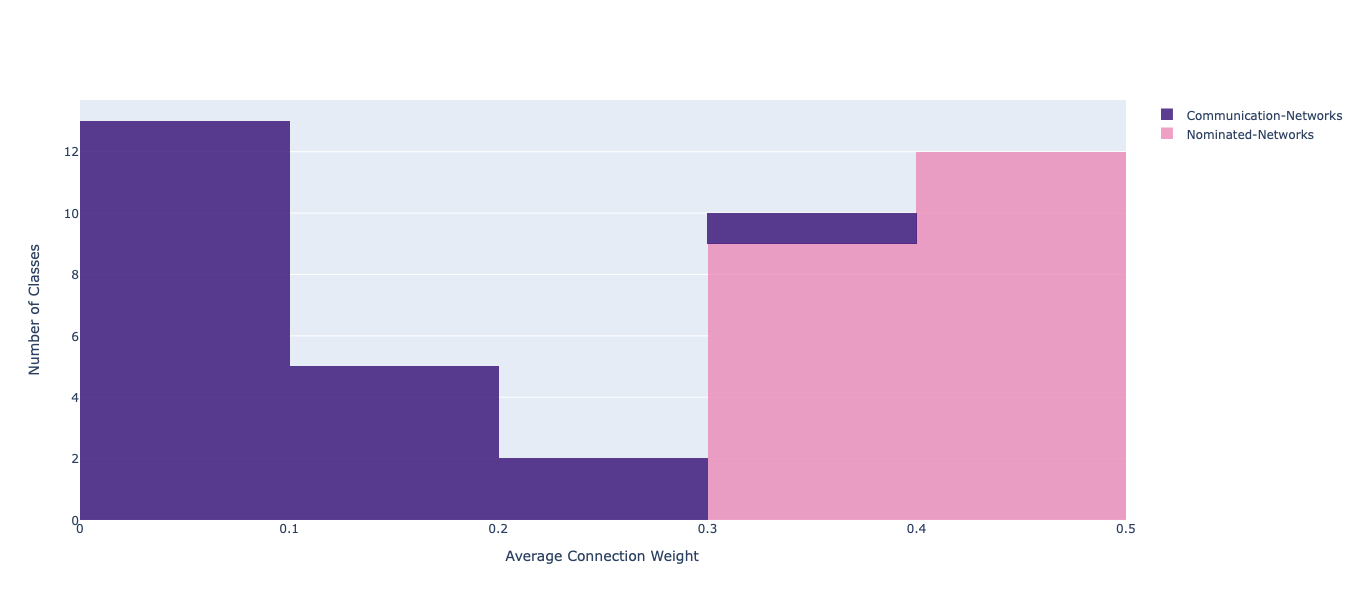

In [262]:
import plotly.graph_objects as go

import numpy as np

x0 = list(agents_details_nomm.groupby('SchoolClassID')['Average_Weight'].mean())

# Add 1 to shift the mean of the Gaussian distribution
x1 = list(agents_details_comm.groupby('SchoolClassID')['Average_Weight'].mean())

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0,
    name='Nominated-Networks', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
     
        size=0.1
    ),
    marker_color='#EB89B5',
    opacity=0.75))
fig.add_trace(go.Histogram(x=x1,
    name='Communication-Networks',
    xbins=dict(
     
        size=0.1
    ),
    marker_color='#330C73',
    opacity=0.75))

# Overlay both histograms
fig.update_layout(xaxis_title="Average Connection Weight", yaxis_title="Number of Classes", width=800, height=600, barmode='stack')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.8)
fig.show()

In [263]:
import statistics
statistics.stdev(x0), statistics.mean(x0)

(0.036349231982335736, 0.39833511854150183)

In [264]:
import statistics
statistics.stdev(x1), statistics.mean(x1)

(0.07571508998719971, 0.1070358681258316)

array([[<AxesSubplot:title={'center':'78.0'}>,
        <AxesSubplot:title={'center':'81.0'}>,
        <AxesSubplot:title={'center':'100.0'}>,
        <AxesSubplot:title={'center':'124.0'}>,
        <AxesSubplot:title={'center':'125.0'}>],
       [<AxesSubplot:title={'center':'256.0'}>,
        <AxesSubplot:title={'center':'258.0'}>,
        <AxesSubplot:title={'center':'261.0'}>,
        <AxesSubplot:title={'center':'262.0'}>,
        <AxesSubplot:title={'center':'263.0'}>],
       [<AxesSubplot:title={'center':'272.0'}>,
        <AxesSubplot:title={'center':'273.0'}>,
        <AxesSubplot:title={'center':'292.0'}>,
        <AxesSubplot:title={'center':'296.0'}>,
        <AxesSubplot:title={'center':'297.0'}>],
       [<AxesSubplot:title={'center':'298.0'}>,
        <AxesSubplot:title={'center':'299.0'}>,
        <AxesSubplot:title={'center':'300.0'}>,
        <AxesSubplot:title={'center':'301.0'}>,
        <AxesSubplot:title={'center':'302.0'}>],
       [<AxesSubplot:title={'center':'

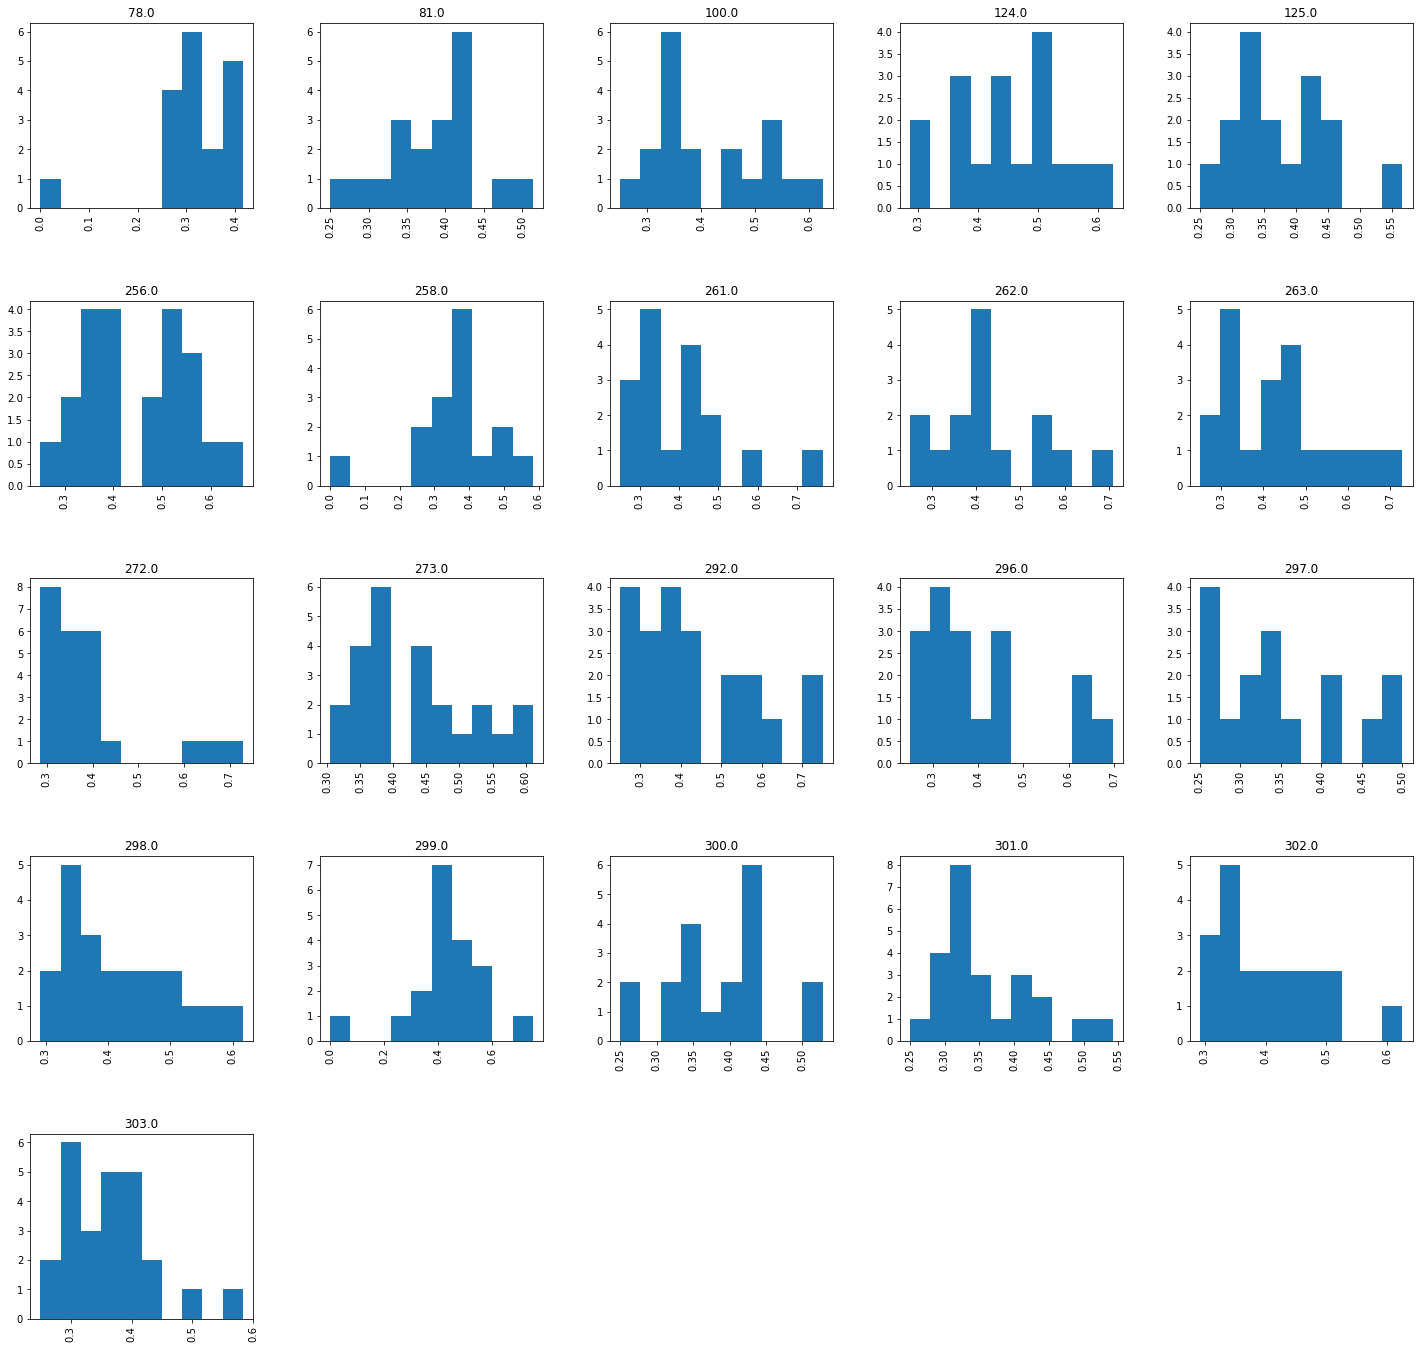

In [265]:
agents_details_nomm['Average_Weight'].hist(by=agents_details_nomm['SchoolClassID'],figsize=(24, 24))

array([[<AxesSubplot:title={'center':'78.0'}>,
        <AxesSubplot:title={'center':'81.0'}>,
        <AxesSubplot:title={'center':'100.0'}>,
        <AxesSubplot:title={'center':'124.0'}>,
        <AxesSubplot:title={'center':'125.0'}>],
       [<AxesSubplot:title={'center':'256.0'}>,
        <AxesSubplot:title={'center':'258.0'}>,
        <AxesSubplot:title={'center':'261.0'}>,
        <AxesSubplot:title={'center':'262.0'}>,
        <AxesSubplot:title={'center':'263.0'}>],
       [<AxesSubplot:title={'center':'272.0'}>,
        <AxesSubplot:title={'center':'273.0'}>,
        <AxesSubplot:title={'center':'292.0'}>,
        <AxesSubplot:title={'center':'296.0'}>,
        <AxesSubplot:title={'center':'297.0'}>],
       [<AxesSubplot:title={'center':'298.0'}>,
        <AxesSubplot:title={'center':'299.0'}>,
        <AxesSubplot:title={'center':'300.0'}>,
        <AxesSubplot:title={'center':'301.0'}>,
        <AxesSubplot:title={'center':'302.0'}>],
       [<AxesSubplot:title={'center':'

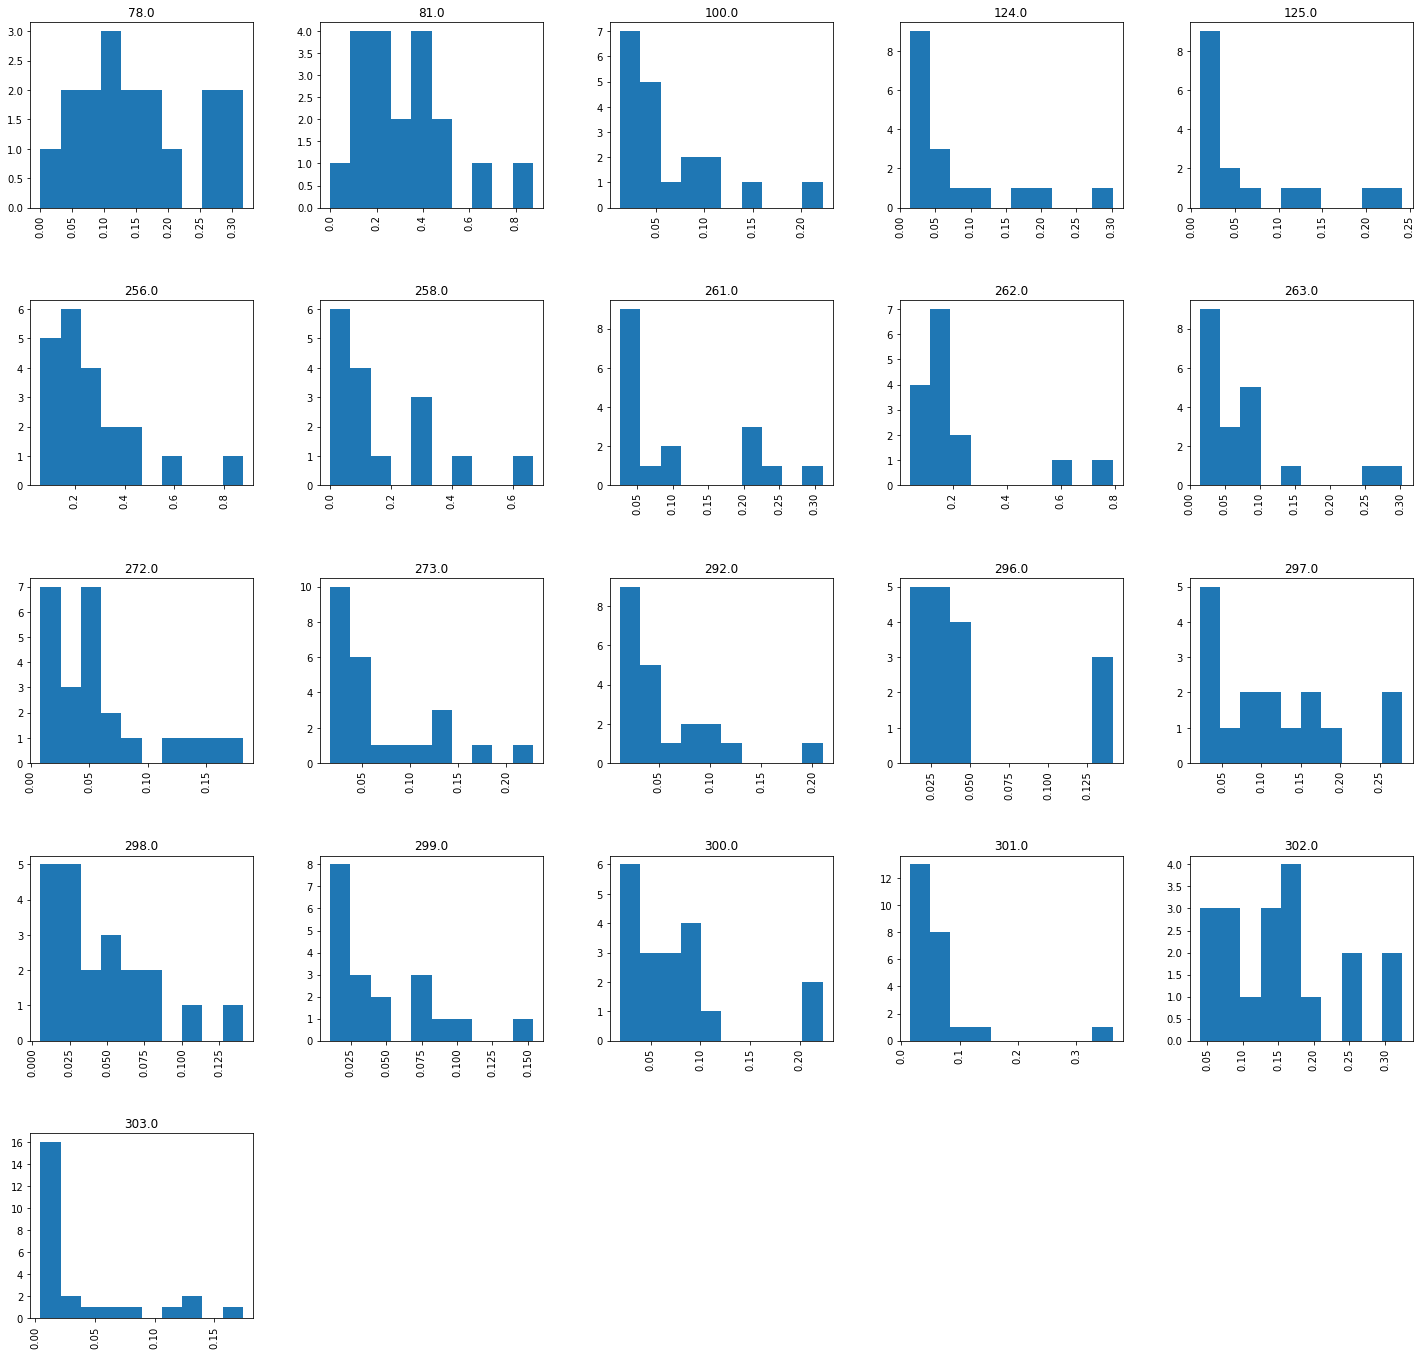

In [266]:
agents_details_comm['Average_Weight'].hist(by=agents_details_comm['SchoolClassID'],figsize=(24, 24))

### Selecting Influencial Agents

In [368]:
df_inf_agents = pd.read_excel('../notebooks/selected_agents_peer.xlsx', index_col=0)

In [369]:
df_inf_agents2 = pd.read_excel('../notebooks/selected_agents_communication.xlsx', index_col=0) 

In [370]:
df_inf_agents['InfluenceAgentsCommunication'] = df_inf_agents2['InfluenceAgents']

In [371]:
df_inf_agents

,SchoolClass,Intervention,InfluenceAgents,InfluenceAgentsCommunication
0,78.0,outdegree,"[1636, 1654, 1736]","[1656.0, 1736.0, 1633.0]"
1,78.0,indegree,"[1636, 1733, 1651]","[1736.0, 1656.0, 1733.0]"
2,78.0,closeness,"[1636, 1733, 1651]","[1733.0, 1636.0, 1736.0]"
3,78.0,betweenness,"[1636, 1736, 1733]","[1636.0, 1733.0, 1736.0]"
4,81.0,outdegree,"[1608, 1605, 1630]","[1620.0, 1608.0, 1623.0]"
...,...,...,...,...
79,302.0,betweenness,"[6038, 6045, 6046]","[6045.0, 6035.0, 6033.0]"
80,303.0,outdegree,"[6068, 6081, 6063, 6074]","[6081.0, 6074.0, 6063.0, 6082.0]"
81,303.0,indegree,"[6063, 6080, 6070, 6068]","[6081.0, 6063.0, 6074.0, 6068.0]"
82,303.0,closeness,"[6063, 6080, 6070, 6068]","[6081.0, 6063.0, 6074.0, 6068.0]"


In [372]:
def get_perc_agents(l1,l2):
    l1 = json.loads(l1)
    l2 = json.loads(l2)
    return (round(len(set(l1).intersection(l2))/len(l1)*100))

In [373]:
def get_num_agents(l1):
    l1 = json.loads(l1)
    return len(l1)

In [374]:
df_inf_agents['PercentageSameInfluencers'] = df_inf_agents.apply(lambda row : get_perc_agents(row['InfluenceAgents'],row['InfluenceAgentsCommunication']), axis = 1)

In [375]:
df_inf_agents['NumInfluencers'] = df_inf_agents.apply(lambda row : get_num_agents(row['InfluenceAgents']), axis = 1)

In [384]:
df_inf_agents = df_inf_agents[df_inf_agents.Intervention.isin(['indegree','closeness','betweenness'])]

In [385]:
df_inf_agents.groupby('NumInfluencers')['SchoolClass'].count()

NumInfluencers
2    12
3    39
4    12
Name: SchoolClass, dtype: int64

In [386]:
df_inf_agents['PercentageSameInfluencers'].describe()

count     63.000000
mean      31.936508
std       28.408241
min        0.000000
25%        0.000000
50%       33.000000
75%       50.000000
max      100.000000
Name: PercentageSameInfluencers, dtype: float64

In [389]:
df_inf_agents.groupby('Intervention')['PercentageSameInfluencers'].mean()

Intervention
betweenness    26.047619
closeness      37.666667
indegree       32.095238
Name: PercentageSameInfluencers, dtype: float64

In [390]:
df_inf_agents.groupby('Intervention')['PercentageSameInfluencers'].std()

Intervention
betweenness    24.292954
closeness      31.875278
indegree       28.717425
Name: PercentageSameInfluencers, dtype: float64

In [391]:
df_inf_agents.groupby('SchoolClass')['PercentageSameInfluencers'].mean()

SchoolClass
78.0     66.666667
81.0     22.000000
100.0    55.666667
124.0    33.000000
125.0     0.000000
256.0    22.000000
258.0     0.000000
261.0    11.000000
262.0    33.333333
263.0    22.000000
272.0     0.000000
273.0     8.333333
292.0     0.000000
296.0    77.666667
297.0    66.666667
298.0    55.666667
299.0    55.666667
300.0    33.000000
301.0    25.000000
302.0    33.000000
303.0    50.000000
Name: PercentageSameInfluencers, dtype: float64

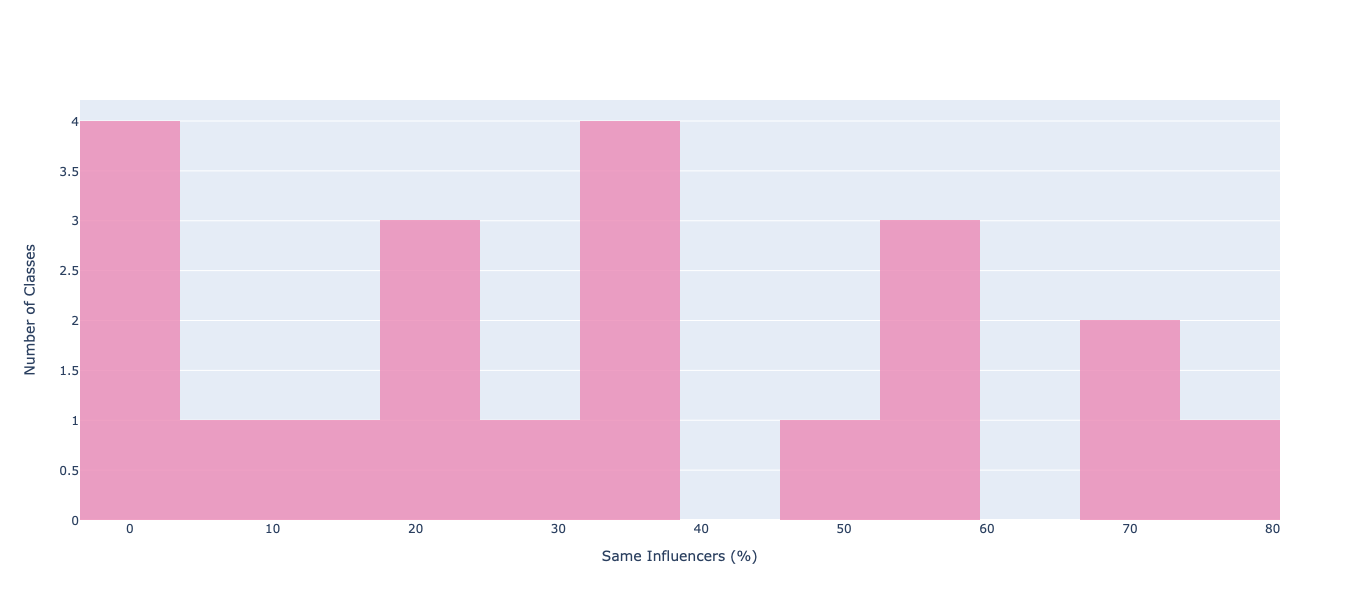

In [398]:
import plotly.graph_objects as go

import numpy as np

x0 = df_inf_agents.groupby('SchoolClass')['PercentageSameInfluencers'].mean()
# Add 1 to shift the mean of the Gaussian distribution

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0,
    name='Nominated-Networks', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        size=7
    ),
    marker_color='#EB89B5',
    opacity=0.75))

# Overlay both histograms
fig.update_layout(xaxis_title="Same Influencers (%)", yaxis_title="Number of Classes",width=800, height=600)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.8)
fig.show()

# Running Simulations - Tunned Parameters

In [35]:
simulation =  s.Simulation()

/Users/bojansimoski/dev/eur/ABM-PA/newsrc/simulation.py:28: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.PeerNominatedDataPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args)
<ipython-input-35-a3380912ab34>:1: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  simulation =  s.Simulation()
/Users/bojansimoski/dev/eur/ABM-PA/newsrc/simulation.py:29: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.CommunicationDataPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)


In [48]:
pars_comm = pd.read_csv('../output/opt_pars_communication.csv', sep=',', header=0)
list_results_comm = []
list_results_avg_comm = []
list_agents_per_intervention_comm = []
start_whole = time.time()
count = 0 
for index, row in pars_comm.iterrows():
    print(count,row['threshold'],row['ipa'])
    results_comm, results_avg_comm, agents_per_intervention_comm = simulation.simulate_interventions(365,'communication',row['threshold'],row['ipa'])
    list_results_comm.append(results_comm)
    list_results_avg_comm.append(results_avg_comm)
    list_agents_per_intervention_comm.append(agents_per_intervention_comm)
    count = count + 1
    end = time.time()
    print("Time elapsed:", end - start_whole, ' seconds')

0 1.0 0.001
Time elapsed: 16.527905702590942  seconds
1 0.975 0.001
Time elapsed: 31.56413698196411  seconds
2 0.95 0.001
Time elapsed: 46.13438081741333  seconds
3 0.925 0.001
Time elapsed: 61.76883578300476  seconds
4 0.9 0.001
Time elapsed: 76.37187886238098  seconds
5 1.0 0.002
Time elapsed: 91.43547296524048  seconds
6 1.0 0.003
Time elapsed: 105.67430686950684  seconds
7 1.0 0.004
Time elapsed: 120.29515194892883  seconds
8 1.0 0.006
Time elapsed: 135.56363987922668  seconds
9 0.8750000000000001 0.001
Time elapsed: 150.26104402542114  seconds
10 1.0 0.005
Time elapsed: 165.3614799976349  seconds
11 1.0 0.011
Time elapsed: 179.8647758960724  seconds
12 1.0 0.01
Time elapsed: 195.6105580329895  seconds
13 1.0 0.008
Time elapsed: 210.1912157535553  seconds
14 1.0 0.009
Time elapsed: 225.60773992538452  seconds
15 1.0 0.007
Time elapsed: 239.16934895515442  seconds
16 1.0 0.013
Time elapsed: 253.4620099067688  seconds
17 1.0 0.015
Time elapsed: 268.4416399002075  seconds
18 1.0 0.012

In [38]:
pars_nomm = pd.read_csv('../output/opt_pars_nominated.csv', sep=',', header=0)
list_results_nomm = []
list_results_avg_nomm = []
list_agents_per_intervention_nomm = []
start_whole = time.time()
count = 0 
for index, row in pars_nomm.iterrows():
    print(count,row['threshold'],row['ipa'])
    results_nomm, results_avg_nomm, agents_per_intervention_nomm = simulation.simulate_interventions(365,'peer',row['threshold'],row['ipa'])
    list_results_nomm.append(results_nomm)
    list_results_avg_nomm.append(results_avg_nomm)
    list_agents_per_intervention_nomm.append(agents_per_intervention_nomm)
    count = count + 1
    end = time.time()
    print("Time elapsed:", end - start_whole, ' seconds')

0 0.025 0.007
Time elapsed: 15.992172956466675  seconds
1 0.025 0.004
Time elapsed: 34.191850900650024  seconds
2 0.025 0.005
Time elapsed: 50.32845687866211  seconds
3 0.025 0.006
Time elapsed: 66.84561681747437  seconds
4 0.025 0.009
Time elapsed: 83.35153675079346  seconds
5 0.025 0.003
Time elapsed: 99.21907472610474  seconds
6 0.025 0.008
Time elapsed: 116.17950582504272  seconds
7 0.025 0.012
Time elapsed: 133.09018802642822  seconds
8 0.025 0.01
Time elapsed: 149.8381769657135  seconds
9 0.025 0.011
Time elapsed: 165.79157876968384  seconds
10 0.025 0.002
Time elapsed: 182.88090181350708  seconds
11 0.025 0.013
Time elapsed: 200.01046681404114  seconds
12 0.025 0.014
Time elapsed: 217.15949273109436  seconds
13 0.025 0.015
Time elapsed: 233.73637199401855  seconds
14 0.05 0.001
Time elapsed: 251.01804184913635  seconds
15 0.025 0.001
Time elapsed: 267.6802659034729  seconds
16 0.075 0.001
Time elapsed: 284.4823217391968  seconds
17 1.0 0.001
Time elapsed: 300.6576318740845  seco

# Ploting the outcomes

In [158]:
# all_averaged = {}
# for i in ['betweenness','closeness','indegree']:
#     result_counter = 0
#     for res_avg in list_results_avg_comm:
#         temp_res = pd.Series([], dtype = float)
#         counter = 0
#         for class_id,res in res_avg.items():
#             temp_res = temp_res.add(res_avg[class_id][i],fill_value=0)
#             counter = counter + 1

#         result_counter = result_counter + 1
#         all_averaged[i] = temp_res/counter
        
# plt.figure(figsize=((15,10)))
# plt.xlim(0,364)
# plt.xlabel('Days')
# plt.ylabel('Mean PA')
# j = 0
# colors = ["green", "yellow", "blue"]
# for i in ['indegree','closeness','betweenness']:
#     all_averaged[i].plot(color=colors[j],label= i)
#     j = j + 1
# plt.legend(title='All Interventions Communication Network ', loc="upper right")

In [159]:
# def get_change(current, previous):
#     if current == previous:
#         return 0
#     try:
#         return round(((current - previous)/previous)*100.0,2)
#     except ZeroDivisionError:
#         return 0 
    
# success_rates_nomm = []
# for class_id in input_args['classes']:
#     for i in ['betweenness','closeness','indegree']:
#         result_counter = 0
#         temp_outcome = pd.Series([], dtype = float)
#         for res_avg in list_results_avg_nomm:
#             temp_outcome = temp_outcome.add(res_avg[str(class_id)][i],fill_value=0)
#             result_counter = result_counter + 1
#         #finished 100 runs
#         temp_outcome = temp_outcome/result_counter
#         success_rates_nomm.append([class_id, i, get_change(temp_outcome[364],temp_outcome[0]), temp_outcome[0] , temp_outcome[364]])
# success_rates_nomm = pd.DataFrame(success_rates_nomm, columns = ["SchoolClass", "Intervention", "SuccessRate", "StartIntervention", "EndIntervention"])
# success_rates_nomm

## Create an average (of 100) of the averaged outcomes - in new dictionary

In [151]:
all_averaged_nomm = {}
for class_id in input_args['classes']:
    all_averaged_nomm[str(class_id)] = {}
    for i in  ['betweenness','closeness','indegree']:
        temp_res = pd.Series([], dtype = float)
        count_res = 0
        for res_avg in list_results_avg_nomm:
            temp_res = temp_res.add(res_avg[str(class_id)][i],fill_value=0)
            count_res = count_res + 1   
        all_averaged_nomm[str(class_id)][i] = temp_res/count_res

In [152]:
all_averaged_comm = {}
for class_id in input_args['classes']:
    all_averaged_comm[str(class_id)] = {}
    for i in  ['betweenness','closeness','indegree']:
        temp_res = pd.Series([], dtype = float)
        count_res = 0
        for res_avg in list_results_avg_comm:
            temp_res = temp_res.add(res_avg[str(class_id)][i],fill_value=0)
            count_res = count_res + 1   
        all_averaged_comm[str(class_id)][i] = temp_res/count_res

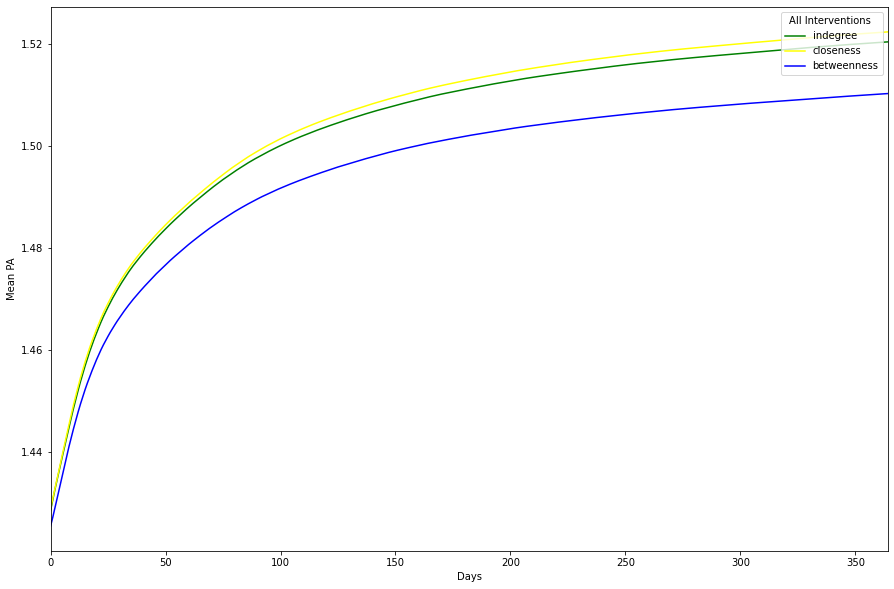

In [153]:
simulation.plot_interventions_averaged(all_averaged_nomm)

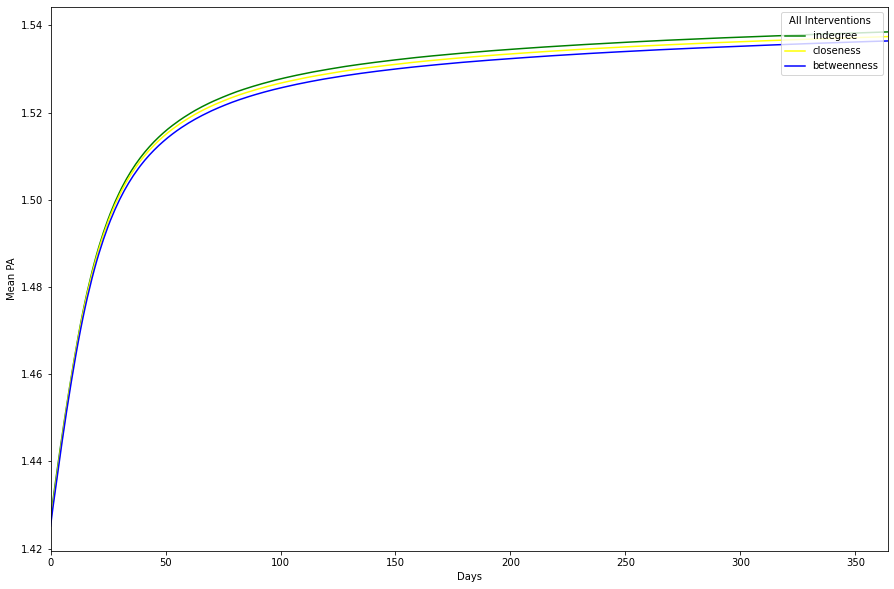

In [154]:
simulation.plot_interventions_averaged(all_averaged_comm)

In [155]:
all_avg_success_rates_comm = simulation.getSuccessRates(all_averaged_comm)
all_avg_success_rates_nomm = simulation.getSuccessRates(all_averaged_nomm)

/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [156]:
display(all_avg_success_rates_nomm.groupby(['Intervention'])['SuccessRate'].mean(),all_avg_success_rates_comm.groupby(['Intervention'])['SuccessRate'].mean())

Intervention
betweenness    6.016190
closeness      6.600476
indegree       6.487619
Name: SuccessRate, dtype: float64

Intervention
betweenness    7.794762
closeness      7.766190
indegree       7.791905
Name: SuccessRate, dtype: float64

In [157]:
all_avg_mean_success_rate_comm = all_avg_success_rates_comm.groupby(['SchoolClass'])['SuccessRate'].mean().reset_index()

all_avg_mean_success_rate_nomm = all_avg_success_rates_nomm.groupby(['SchoolClass'])['SuccessRate'].mean().reset_index()

display(all_avg_mean_success_rate_nomm,all_avg_mean_success_rate_comm)

,SchoolClass,SuccessRate
0,100.0,2.900000
1,124.0,4.536667
2,125.0,2.590000
3,256.0,6.546667
4,258.0,12.260000
5,261.0,2.876667
6,262.0,8.223333
7,263.0,5.603333
8,272.0,4.383333
9,273.0,2.743333


,SchoolClass,SuccessRate
0,100.0,10.126667
1,124.0,8.633333
2,125.0,5.350000
3,256.0,7.073333
4,258.0,6.870000
5,261.0,3.750000
6,262.0,6.636667
7,263.0,9.566667
8,272.0,4.013333
9,273.0,9.650000
